In [1]:
%pylab inline
import time
import numpy as np
import matplotlib.pyplot as plt
from utils import img_utils
import seaborn as sns
import utils.math_utils as mu

Populating the interactive namespace from numpy and matplotlib


In [2]:
def print_results(t_snr=25):
    base_folder = './resultados/'

    print '==[Tsnr=%d] =='%t_snr
    
    Yhr_norms = np.load(base_folder+ 'Yhr_norms/Yhr_norms_Tsnr' + str(t_snr) + '.npy')
    print 'Yhr_norm_mean=', np.array(Yhr_norms).mean()
    print 'Yhr_norm_std=', np.std(Yhr_norms)
    print

    Ylr_norms = np.load(base_folder+ 'Ylr_norms/Ylr_norms_Tsnr' + str(t_snr) + '.npy')
    print 'Ylr_norm_mean=', np.array(Ylr_norms).mean()
    print 'Ylr_norm_std=', np.std(Ylr_norms)

    dif_norms = np.load(base_folder+ 'dif_norms/dif_norms_Tsnr' + str(t_snr) + '.npy')
    print 'dif_norms_mean=', np.array(dif_norms).mean()
    print 'dif_norms_std=', np.std(dif_norms)
    print

    optimal_vals = np.load(base_folder+ 'optimal_vals/optimal_vals_Tsnr' + str(t_snr) + '.npy')
    print 'optimal_vals_mean=', np.array(optimal_vals).mean()
    print 'optimal_vals_std=', np.std(optimal_vals)
    print

    times = np.load(base_folder+ 'times/times_Tsnr' + str(t_snr) + '.npy')
    print 'times_mean=', np.array(times).mean()
    print 'times_std=', np.std(times)
    print


In [3]:
print_results(t_snr=25)

==[Tsnr=25] ==
Yhr_norm_mean= 17931.7637678
Yhr_norm_std= 18.2182528978

Ylr_norm_mean= 6436.84554019
Ylr_norm_std= 13.398635669
dif_norms_mean= 770.038227065
dif_norms_std= 3.36946031513

optimal_vals_mean= 3051.4604561
optimal_vals_std= 500.031892358

times_mean= 309.031538963
times_std= 3.7795986076



In [11]:
print_results(t_snr=50)

==[Tsnr=50] ==
Yhr_norm_mean= 17892.5221937
Yhr_norm_std= 46.7618915345

Ylr_norm_mean= 6420.40925906
Ylr_norm_std= 8.59257946717
dif_norms_mean= 713.489408081
dif_norms_std= 14.3176683433

optimal_vals_mean= 3083.35550031
optimal_vals_std= 559.471776744

times_mean= 304.826362562
times_std= 6.25090245471



A_Tsnr25_lrsnr25.npy (12, 12, 12, 6)
(12, 12, 12, 6) y= 6


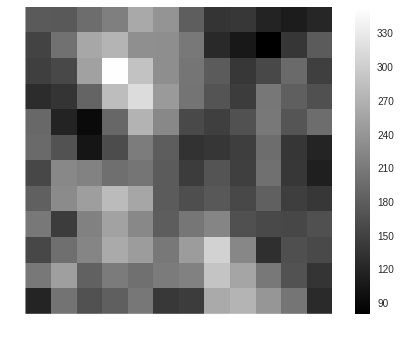

In [10]:
base_folder = './resultados/reconstruc/'
name = 'A_Tsnr%d_lrsnr%d.npy'% (25, 25)
A = np.load(base_folder+ name)
print name, A.shape
img_utils._is(A, b=2)
del A